In [10]:
''' Importing the required packages '''
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

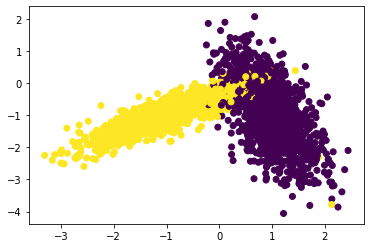

In [11]:
''' Plotting the class data details'''
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [62]:
''' custom function for diving the dataset details according to train and test data based on k value'''
def get_k_folds_split_train_test_datasets(dataset_length,folds=3):
    ''' Getting the basic details'''
    dataset_indexs = np.arange(dataset_length).tolist()
    split_datasets = []
    split_range = int(dataset_length/folds)
    test_start_index = 0
    for i in range(folds):
        test_end_index = (i+1)*split_range
        ''' Get test date details '''
        test_data  = dataset_indexs[test_start_index:test_end_index]
        ''' Get train date details by removing the test details from whole dataset'''
        train_data = list(set(dataset_indexs).difference(test_data))
        test_start_index = test_end_index
        ''' Append each train and test cross validation details'''
        split_datasets.append([train_data, test_data])
    return split_datasets


In [64]:
''' Custom function for calculating the train and test scores for the given folds'''
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    trainscores = []
    testscores  = []
    ''' Get the random ten unique folds from given range'''
    unique_values = np.random.randint(low=param_range[0], high=param_range[1] , size=(1,10)).tolist()
    # using set because if user input range is less than 10 (high-low<10)  then numbers are repeated in order to handle it 
    params = sorted(list(set(unique_values[0])))
    print(params)
    ''' Iterate through fold'''
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        get_k_folds_datasets = get_k_folds_split_train_test_datasets(len(x_train),folds=k)
        ''' For each fold after dataset splitting according to random fold value'''
        for each_split_dataset in get_k_folds_datasets:
            train_indices = each_split_dataset[0]
            test_indices  = each_split_dataset[1]
            ''' Get details based on indexs returned after k-fold splitting'''
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            ''' Fitting the data into the classifier after randomsearch dataset details'''
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            ''' Test predection scores '''
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))
            ''' Train predection scores '''
            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        ''' Appending each random search train and test loss scores'''
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params            



  0%|          | 0/10 [00:00<?, ?it/s]

[101, 106, 110, 111, 121, 126, 133, 135, 137, 155]
74




 10%|█         | 1/10 [00:44<06:40, 44.52s/it]

70




 20%|██        | 2/10 [01:29<05:57, 44.67s/it]

68




 30%|███       | 3/10 [02:18<05:20, 45.84s/it]

67




 40%|████      | 4/10 [35:24<1:02:47, 627.95s/it]

61




 50%|█████     | 5/10 [56:31<1:08:18, 819.74s/it]

59




 60%|██████    | 6/10 [57:34<39:31, 592.84s/it]  

56




 70%|███████   | 7/10 [58:44<21:47, 435.87s/it]

55




 80%|████████  | 8/10 [1:00:10<11:01, 330.93s/it]

54




 90%|█████████ | 9/10 [1:01:33<04:16, 256.39s/it]

48




100%|██████████| 10/10 [1:03:07<00:00, 378.80s/it]


[0.9570281563572461, 0.9570748368419716, 0.956919708386339, 0.9568323873449667, 0.9566623968608594, 0.9567838424174937, 0.9573062829023122, 0.9572509514215356, 0.9572778016316016, 0.9569875158000452] [0.9566497190259567, 0.9567385444743935, 0.9565508021390374, 0.9567029716283447, 0.9563744750033873, 0.9565509819747108, 0.9570354457572501, 0.9567676767676769, 0.9571505812381724, 0.9568548387096775] [101, 106, 110, 111, 121, 126, 133, 135, 137, 155]


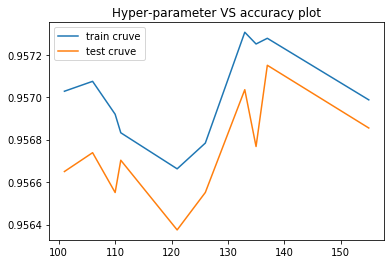

In [72]:
''' Importing the packages ''' 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
''' Defining the KNN calssifier '''
neigh = KNeighborsClassifier()
param_range = (100,200)
folds = 3
''' calling the randomsearchcv function '''
trainscores,testscores,params = RandomSearchCV(X_train, y_train, neigh, param_range, folds)
print(trainscores,testscores,params)
''' Drawing the plot by passing trainscores and testscores as shown below '''
plt.plot(params ,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

    1. I tested on hyper paramters from 1 to 200
    2. Based on above plot and eariler plot whihc i added as image below i observer few hyper parameter like 110,146 and 155
    3. By comparing all the values i am seeing in 146 and 155 train loss is high even test loss is more but for 110 train and test are more balanced 
    4. so i am taking the best hyper paramter as 110


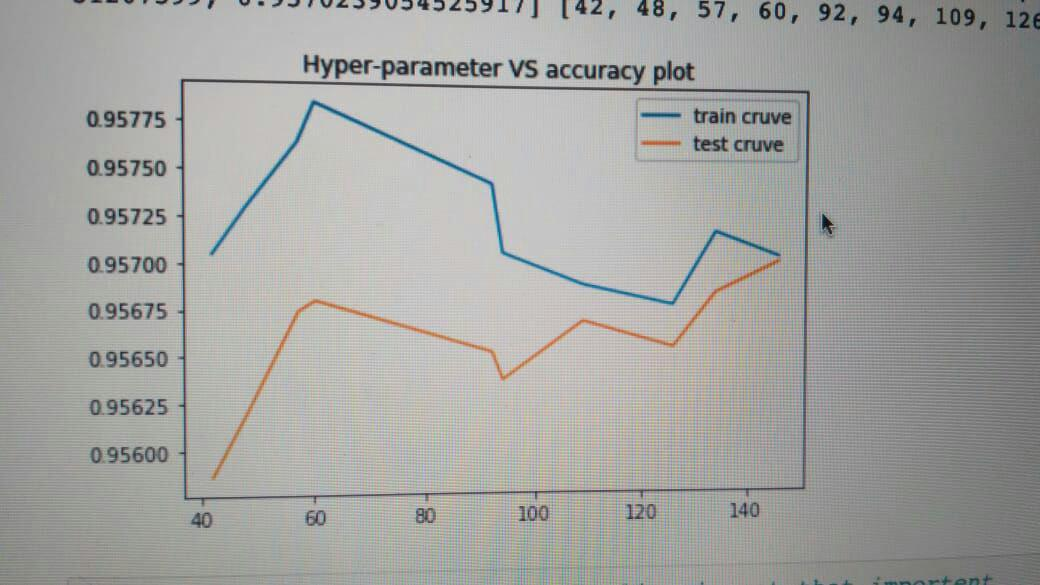

In [74]:
''' Decision boundary function is refrenced from AAIC NOTES '''
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

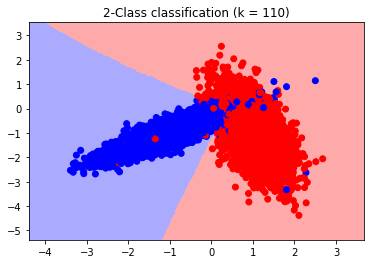

In [76]:
''' Drawing the plot for best hyper parameter for 2-class classication'''
from matplotlib.colors import ListedColormap
''' Plotting for k as 110 (best hyper parameter)'''
neigh = KNeighborsClassifier(n_neighbors = 110)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)